In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("loan.csv")

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\2042666052.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [15]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.iloc[:,:].isna().sum()
# below we can see some columns has completely NAN data, we can clean that

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [17]:
df.replace(0, np.nan, inplace=True)
# in dataframe there are columns which have 0 values, some columns has combination of 0 and NA value,
# we can replace 0 with NA and drop those columns

In [18]:
df = df.dropna(axis=1, how='all')

In [19]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,117.08,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,16.97,NaN,NaN,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,Jul-10,80.90,NaN,Jun-10,1,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,Jul-10,281.94,NaN,Jul-10,1,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,Apr-08,NaN,NaN,Jun-07,1,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,Jan-08,NaN,NaN,Jun-07,1,INDIVIDUAL,NaN


In [20]:
df.iloc[:,:].isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv              129
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                          183
delinq_2yrs                35405
earliest_cr_line               0
inq_last_6mths             19300
mths_since_last_delinq     26125
mths_since_last_record     37601
open_acc  

In [21]:
# check if there is any duplicate row
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies


In [22]:
# drop row which has NA in all columns
df.dropna(how='all',inplace=True) 

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\857103075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='all',inplace=True)


In [23]:
df.shape

(39717, 52)

In [24]:
# dropping uneccesary columns
df.drop(["id","member_id","url","emp_title", "desc", "purpose", "title", "zip_code", "addr_state", "next_pymnt_d", "mths_since_last_record", "policy_code","pymnt_plan", "initial_list_status","pub_rec","delinq_2yrs","out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","pub_rec_bankruptcies","inq_last_6mths","mths_since_last_delinq"], axis=1, inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\3579454275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["id","member_id","url","emp_title", "desc", "purpose", "title", "zip_code", "addr_state", "next_pymnt_d", "mths_since_last_record", "policy_code","pymnt_plan", "initial_list_status","pub_rec","delinq_2yrs","out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","pub_rec_bankruptcies","inq_last_6mths","mths_since_last_delinq"], axis=1, inplace=True)


In [25]:
df.shape

(39717, 28)

In [26]:
df.iloc[:,:].isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv         129
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
dti                     183
earliest_cr_line          0
open_acc                  0
revol_bal               994
revol_util               50
total_acc                 0
total_pymnt              16
total_pymnt_inv         165
total_rec_prncp          74
total_rec_int            71
last_pymnt_d             71
last_pymnt_amnt          74
last_credit_pull_d        2
application_type          0
dtype: int64

In [27]:
col = df.columns

In [28]:
col

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [29]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,83.70%,9,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,9.40%,4,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,98.50%,10,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,21%,37,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,53.90%,38,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,May-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,13.10%,40,2822.969293,1213.88,2500.00,322.97,Jul-10,80.90,Jun-10,INDIVIDUAL
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,...,26.90%,9,9913.491822,1020.51,8500.00,1413.49,Jul-10,281.94,Jul-10,INDIVIDUAL
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,19.40%,20,5272.161128,1397.12,5000.00,272.16,Apr-08,NaN,Jun-07,INDIVIDUAL
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,0.70%,26,5174.198551,672.66,5000.00,174.20,Jan-08,NaN,Jun-07,INDIVIDUAL


In [30]:
# now we we check these columns data, if they are not usefull we will remove it 

In [31]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [32]:
# siince current status is nither Fully paid nor Charged-off we can remove that and do further analysis

In [33]:
# removing rows which has loan_status Current 
df = df[~(df.loan_status == "Current")]

In [34]:
df.shape

(38577, 28)

In [35]:
df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [36]:
for i in col:
    print(i)
    print(df[i].value_counts())
    print("*****************")

loan_amnt
10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64
*****************
funded_amnt
10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: funded_amnt, Length: 1019, dtype: int64
*****************
funded_amnt_inv
5000.00000     1294
10000.00000    1264
6000.00000     1182
12000.00000    1016
8000.00000      887
               ... 
24240.11000       1
16458.93000       1
18911.95000       1
8766.79000        1
9906.30791        1
Name: funded_amnt_inv, Length: 8049, dtype: int64
*****************
term
 36 months    29096
 60 months     9481
Name: term, dtype: int64
*****************
int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.2

In [37]:
# since application_type has only 1 value we can drop that
df.drop(["application_type"], axis=1, inplace=True)

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\4205798008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["application_type"], axis=1, inplace=True)


In [38]:
df.shape

(38577, 27)

In [39]:
# removing % from int_rate
df["int_rate"]= df.int_rate.apply(lambda x: float(x[:-1]))

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\3580903915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_rate"]= df.int_rate.apply(lambda x: float(x[:-1]))


In [40]:
df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [41]:
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20907560700>,
 'caps': [<matplotlib.lines.Line2D at 0x20907560c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x20907560460>],
 'medians': [<matplotlib.lines.Line2D at 0x20907561180>],
 'fliers': [<matplotlib.lines.Line2D at 0x20907561420>],
 'means': []}

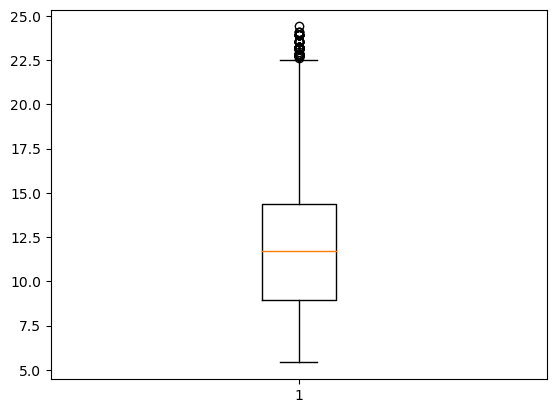

In [42]:
plt.boxplot(df.int_rate)

In [43]:
df['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20903f9c6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20903f9cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20903f9c400>],
 'medians': [<matplotlib.lines.Line2D at 0x20903f9d120>],
 'fliers': [<matplotlib.lines.Line2D at 0x20903f9d3c0>],
 'means': []}

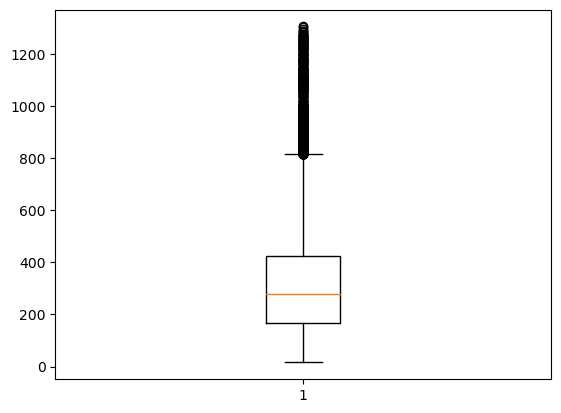

In [44]:
plt.boxplot(df.installment)

In [45]:
df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


<Axes: xlabel='installment', ylabel='loan_status'>

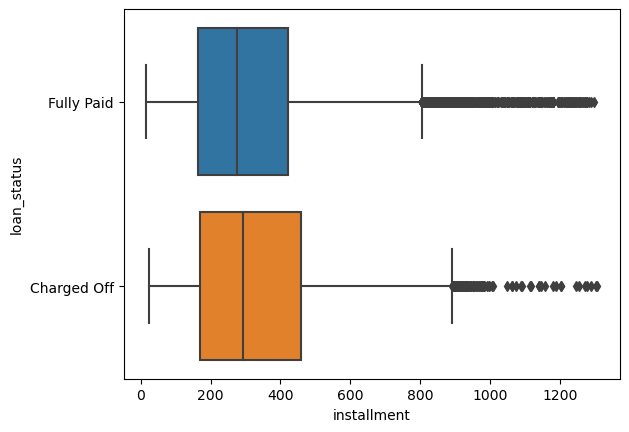

In [46]:
sns.boxplot(x="installment", y="loan_status",data=df)
# from this graph we see that no of installment for charged of is higher that fully paid

In [47]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


<Axes: xlabel='int_rate', ylabel='loan_status'>

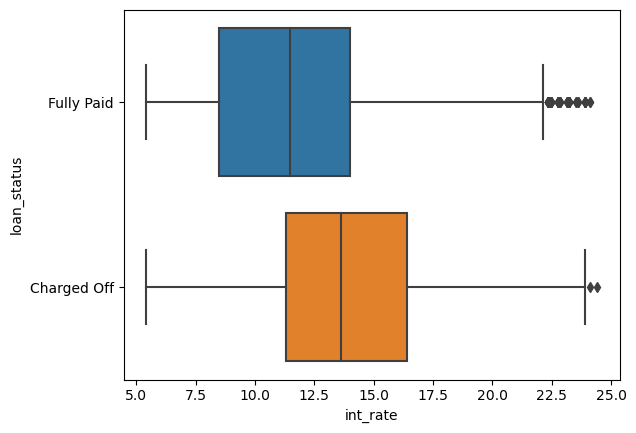

In [48]:
sns.boxplot(x="int_rate", y="loan_status",data=df)
# from this graph we see that charged-off have intrest rate higher

In [49]:
pd.crosstab(df['grade'], df['loan_status'])
# we see that person who has a good grade has good change that they will have Fully paid status 

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,319,657
G,101,198


<Axes: xlabel='grade'>

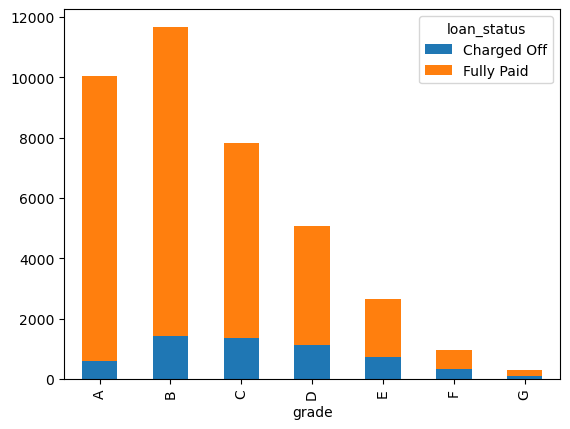

In [50]:
pd.crosstab(df['grade'],df['loan_status']).plot(kind="bar",stacked=True)

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

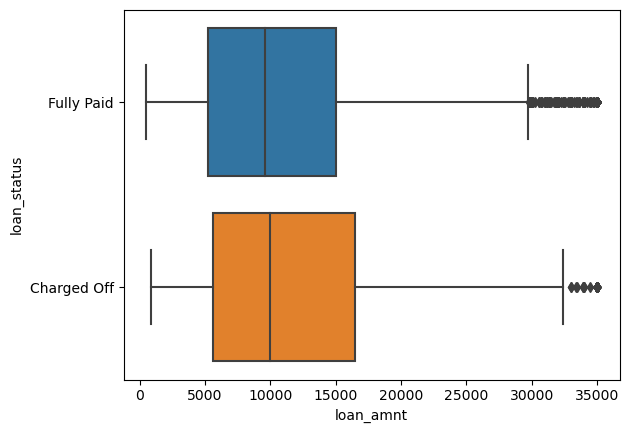

In [51]:
sns.boxplot(x="loan_amnt", y="loan_status",data=df)


In [52]:
df.groupby('loan_status')['loan_amnt'].describe()
# here we see that loan_amt for Charged_off is higher

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


In [53]:
pd.crosstab(df['home_ownership'],df['loan_status'])


loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2327,14694
NONE,0,3
OTHER,18,80
OWN,443,2532
RENT,2839,15641


In [54]:
df.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<Axes: xlabel='home_ownership'>

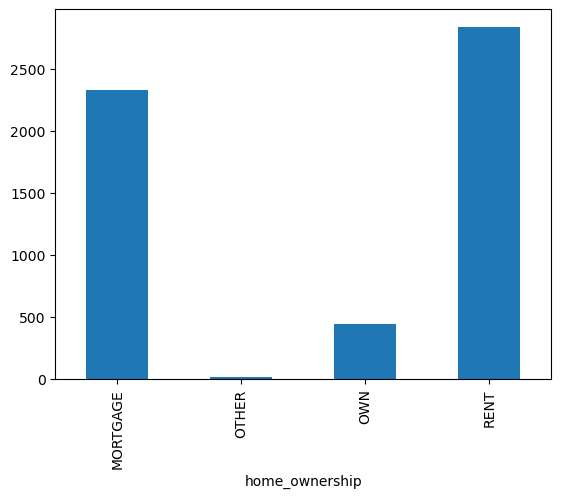

In [55]:
df.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)

<Axes: xlabel='home_ownership'>

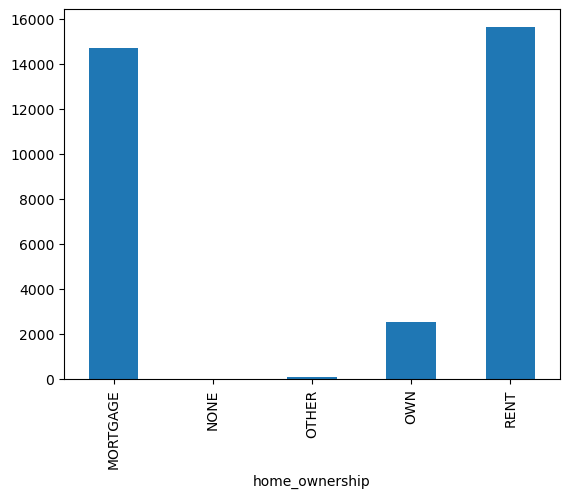

In [56]:
df.groupby('home_ownership')['loan_status'].value_counts().loc[:,'Fully Paid'].plot(kind="bar",stacked=True)

In [57]:
# with home_ownership we can't identity much

<Axes: xlabel='term'>

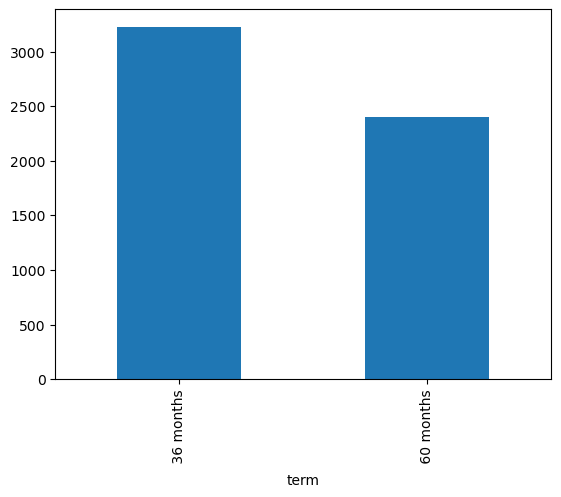

In [58]:
df.groupby('term')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# from this we can see that person who has term, 36 months are more defaulted

In [59]:
pd.crosstab(df['term'],df['loan_status'])

loan_status,Charged Off,Fully Paid
term,,
36 months,3227,25869
60 months,2400,7081


In [60]:
df.application_type

AttributeError: 'DataFrame' object has no attribute 'application_type'

In [ ]:
df1 = df[df.loan_status=="Charged Off"]

In [ ]:
df1.verification_status.value_counts()

In [ ]:
df.groupby('verification_status')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we see that Not Verified and Verified both varification status can be defaulted

In [ ]:
df.annual_inc.describe()

In [ ]:
# let's dive annual_inc in bucket
df.annual_inc.sort_values()

In [ ]:
df.head()

In [ ]:
plt.boxplot(df.annual_inc)

In [ ]:
# remove outliers from annual_inc
df = df[(df.annual_inc < 1000000)]

<Axes: xlabel='loan_status', ylabel='annual_inc'>

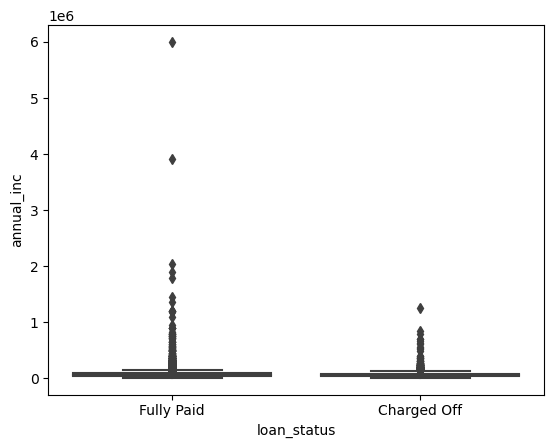

In [61]:
sns.boxplot(y="annual_inc", x="loan_status",data=df)


In [62]:
df.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,62427.298034,47776.014188,4080.0,37000.00,53000.0,75000.0,1250000.0
Fully Paid,32950.0,69862.503328,66562.246521,4000.0,41132.75,60000.0,84000.0,6000000.0


In [63]:
df["IncomeBucket"] = pd.qcut(df['annual_inc'],[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\1458698179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IncomeBucket"] = pd.qcut(df['annual_inc'],[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])


<Axes: xlabel='IncomeBucket'>

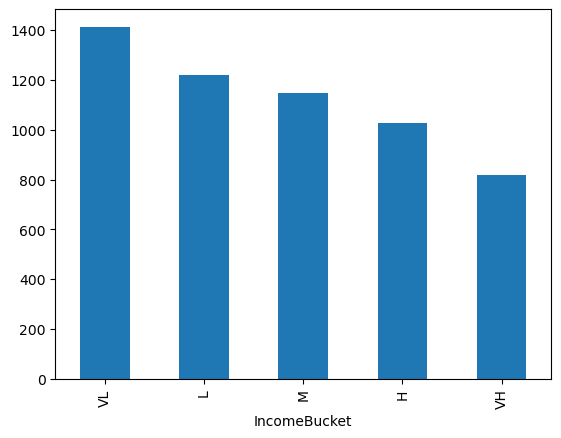

In [64]:
df.groupby('IncomeBucket')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# from this we see that lower the annual income higher the Charged-off

In [65]:
# issue_d
df["issue_year"] = df.issue_d.apply(lambda x: int("20"+x[-2:]))
df["issue_month"] = df.issue_d.apply(lambda x: x[:3])

C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\2295446282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["issue_year"] = df.issue_d.apply(lambda x: int("20"+x[-2:]))
C:\Users\bhara\AppData\Local\Temp\ipykernel_12496\2295446282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["issue_month"] = df.issue_d.apply(lambda x: x[:3])


In [66]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,IncomeBucket,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,May-16,VL,2011,Dec
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,Sep-13,VL,2011,Dec
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,May-16,VL,2011,Dec
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,Apr-16,L,2011,Dec
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,5632.210000,5632.21,5000.00,632.21,Jan-15,161.03,Jan-16,VL,2011,Dec


<Axes: xlabel='issue_year'>

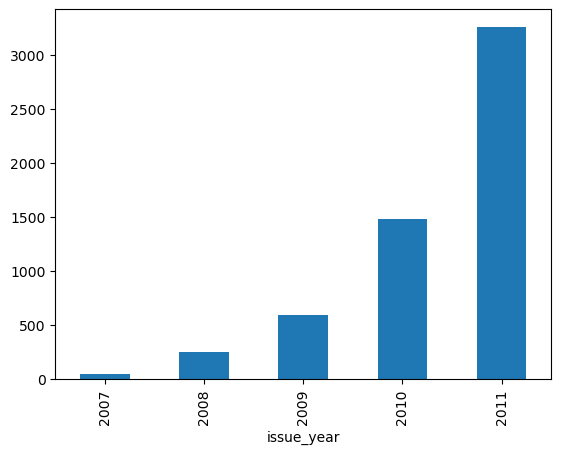

In [67]:
df.groupby('issue_year')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we can notice that Charged-off suddenly increased very much in 2011

<Axes: xlabel='issue_month'>

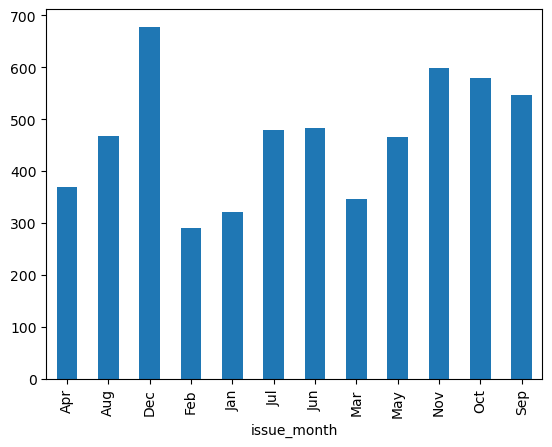

In [68]:
df.groupby('issue_month')['loan_status'].value_counts().loc[:,'Charged Off'].plot(kind="bar",stacked=True)
# here we can notice that Charged-off suddenly increased very much in month of Dec

In [69]:
# bedit to income ratio
df.dti.describe()

count    38399.000000
mean        13.334253
std          6.626878
min          0.010000
25%          8.210000
50%         13.410000
75%         18.580000
max         29.990000
Name: dti, dtype: float64

In [70]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5598.0,14.073153,6.524848,0.01,9.15,14.34,19.3075,29.85
Fully Paid,32801.0,13.208149,6.636019,0.01,8.06,13.24,18.4300,29.99


<Axes: xlabel='loan_status', ylabel='dti'>

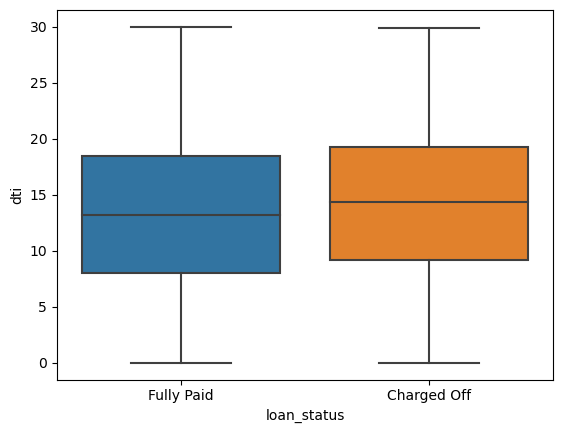

In [71]:
sns.boxplot(x="loan_status", y="dti",data=df)
# from this we can see that higher the dti higher the Charged-off

In [72]:
# conclusion


# Charged-off highly depends on factors like int_rate, grade, loan_amnt, term, annual_inc, issue_year, dti .
# more these factor higher the chances of Defaulted

In [73]:
df.shape

(38577, 30)